# Homework 6: Clustering (50 points)


Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.  

Homework 6 is due on **Thursday, February 16 at 9:00am**. Late work will not be accepted.  

In [1]:
# Don't change this cell; just run it. 
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Clustering: Crime Rates (20 points) 

The data below contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban area:

-    Murder: 	 	Murder arrests (per 100,000)
- 	Assault: 	 	Assault arrests (per 100,000)
- 	UrbanPop: 	 	Percent urban population
- 	Rape: 	 	Rape arrests (per 100,000) 



In [8]:
# this commands loads the data into a data frame
crime_df=pd.read_csv("crime_rates.csv")
print(np.shape(crime_df))
crime_df.head(10)

(50, 5)


,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [11]:
by_state = crime_df.groupby('State').sum()
by_state.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


#### Question 1.1 ( Complete linkage, 5 points)

Using the original data and hierarchical clustering with complete linkage and Euclidean distance, cluster the states. Cut the dendogram at a height that results in three distinct clusters. Which states belong to which clusters?

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

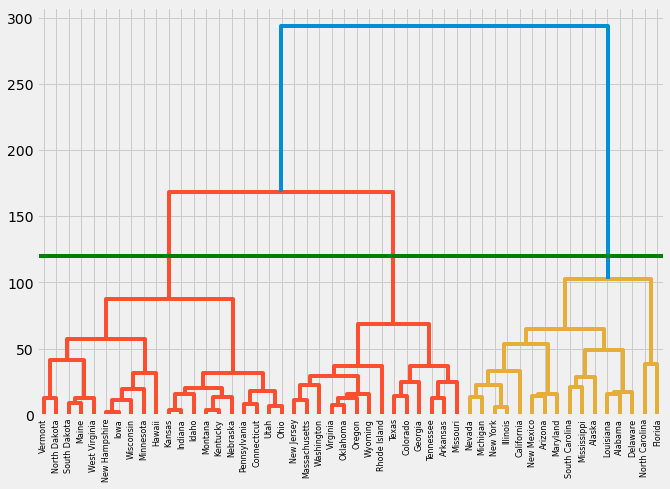

In [29]:
clust1 = linkage(by_state, 'complete')
plots.figure(figsize=(10, 7))  
dendrogram(clust1,  
            orientation='top',
            labels=list(crime_df['State']),
            distance_sort='descending')
plots.axhline(y = 120, color = 'green', linestyle = '-')
plots.show()  

In [22]:
clust1

array([[ 14.        ,  28.        ,   2.29128785,   2.        ],
       [ 16.        ,  25.        ,   3.8340579 ,   2.        ],
       [ 13.        ,  15.        ,   3.92937654,   2.        ],
       [ 12.        ,  31.        ,   6.23698645,   2.        ],
       [ 34.        ,  43.        ,   6.63777071,   2.        ],
       [ 35.        ,  45.        ,   7.35527022,   2.        ],
       [  6.        ,  37.        ,   8.0274529 ,   2.        ],
       [ 18.        ,  40.        ,   8.53756406,   2.        ],
       [ 48.        ,  50.        ,  10.86001842,   3.        ],
       [ 20.        ,  29.        ,  11.45643924,   2.        ],
       [ 36.        ,  55.        ,  12.42497485,   3.        ],
       [  3.        ,  41.        ,  12.61427762,   2.        ],
       [ 47.        ,  57.        ,  12.77536692,   3.        ],
       [ 33.        ,  44.        ,  13.04492238,   2.        ],
       [ 21.        ,  27.        ,  13.29736816,   2.        ],
       [ 26.        ,  51

The states in each cluster can be shown in the x-axis of the dendrogram. The clusters are the right branch of the red lines, the left branch of red, and the yellow branch. 

#### Question 1.2 (Standard units, 5 points)

Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states **after standardizing the four variables.** What effect does standardization have on the clustering obtained? Should the variables be standardized before the clustering? Justify your answer.


In [28]:
# code here and in additional cells if needed
# work with standard units
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)  

crime_norm_df=pd.DataFrame(
        {"State":crime_df.State,
         "Murder": standard_units(crime_df.Murder),
         "Assault": standard_units(crime_df.Assault),
         "UrbanPop": standard_units(crime_df.UrbanPop),
         "Rape": standard_units(crime_df.Rape)})
         
crime_norm_df.head(5)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,1.242564,0.782839,-0.520907,-0.003416
1,Alaska,0.507862,1.106823,-1.211764,2.484203
2,Arizona,0.071633,1.478803,0.998980,1.042878
3,Arkansas,0.232349,0.230868,-1.073593,-0.184917
4,California,0.278268,1.262814,1.758923,2.067820


In [31]:
norm_by_state = crime_norm_df.groupby('State').sum()

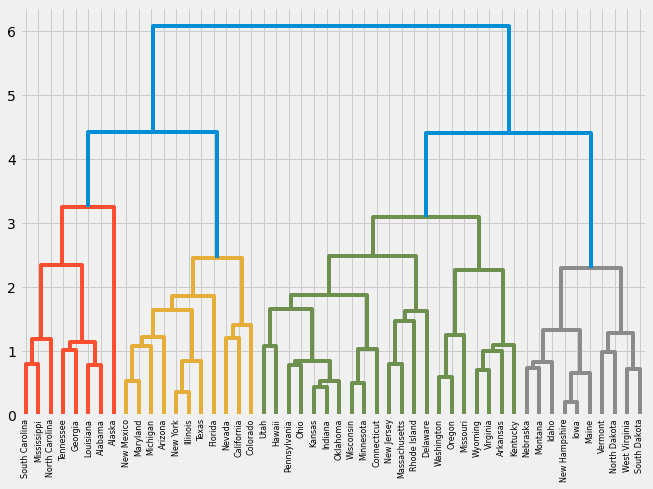

In [33]:
clust1 = linkage(norm_by_state, 'complete')
plots.figure(figsize=(10, 7))  
dendrogram(clust1,  
            orientation='top',
            labels=list(crime_df['State']),
            distance_sort='descending')
plots.show()  

After standardizing there are four clusters (under the line y=4) instead of the previous three as indicated by the 4 different colorings of groupings. In regards to this data standardizing does not entirely make sense. If we are trying to group the various states by safety level, then 

#### Question 1.3 (K-means, 5 points)

Perform K-means on the standardized data. The goal here is to determine a reasonable K using the **elbow plot** argument we discussed in class. For K=1,2,...,10 calculate the objective function (sum of squared deviations) at the step where the K-means algorithm converges and plot it against K. Discuss which K you would choose to perform K-means.


In [25]:
# code here and in additional cells if needed


*Write your answer here, replacing this text.*

#### Question 1.4 (K-means clusters, 5 points)

Perform K-means on the standardized data with the K you proposed in Q1.3. How do the clusters compare to what you discovered using hierarchical clustering?


In [ ]:
# code here and in additional cells if needed
...

*Write your answer here, replacing this text.*

## 2. State voting (30 points) 

We look here at how states voted in presidential elections between 1972 and 2020. We would like to identify clusters showing groups of states that vote similarly.

We downloaded the data from Wikipedia: https://en.wikipedia.org/wiki/List_of_United_States_presidential_election_results_by_state.

The first table on that page was saved in a file called `presidential_elections.csv`. Run the cells below to upload the data and see some info on it.

In [3]:
df = pd.read_csv("presidential_elections.csv")
df.shape

(53, 67)

In [ ]:
df.head(5)

#### Question 2.1 ( Data cleaning, 10 points)

The data in this table is messy. Create a clean version of this table called `df_1972_2020_clean`. It should contain exactly 51 rows (corresponding to the 50 states plus Washington DC) and 13 columns (one for each of the election years from 1972 to 2020).

Also create an array with the state names, `states`, that has length 51 and contains the states in the order corresponding to the rows of the data frame.

Hint. The following panda functions are useful: iloc, drop, rename.

**Notes**: 
- Feel free to open your csv file in Excel or Google Sheets to explore the data if you find that easier. **However, we require that you do your actual data cleaning in pandas, i.e. don't just delete and rename columns in Excel.**
- In your projects, it is sometimes more convenient to manually do your data cleaning using Excel or other tools. The downside of doing this is that you have no record of what you did, and if you have to redownload the data, you have to redo the manual data cleaning process.

In [ ]:
# code here and in additional cells if needed
...

#### Question 2.2 ( Numerical results, 4 points)

To perform clustering, we need to convert our data into being numerical. To do this, replace all of the "D" characters with the number 0, and all of the "R" characters with the number 1. Assign the resulting table to `df_1972_2020_numerical`.

In [ ]:
# code here and in additional cells if needed
...

#### Question 2.3 (Similar states , 6 points)

As you might expect, some states voted exactly alike in these elections. This question asks you to find:
1. The list of states that voted only Republican over this time period.
2. The list of states that voted only Democratic over this time period.
3. The list of states that voted exactly the same as Illinois over this time period.

Comment briefly on your findings (were you surprised by the IL list?).


In [ ]:
# code here and in additional cells if needed
...

*Write your answer here, replacing this text.*

#### Question 2.4 ( State clustering, 10 points)

You are asked here to cluster states according to their voting record and write a short description of your findings. 

You need to decide on the method of clustering and on the best way to present your results. 

In [ ]:
# code here and in additional cells if needed
...

*Write your answer here, replacing this text.*